<a href="https://colab.research.google.com/github/4mh23cs107-hub/image_classification_using_CNN/blob/main/train_the_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Step 2: Set dataset paths
train_dir = "/content/train"

In [ ]:
from google.colab import files
import os
import shutil

# Create folders in Colab
os.makedirs("/content/train/cat", exist_ok=True)
os.makedirs("/content/train/dog", exist_ok=True)
os.makedirs("/content/test/cat", exist_ok=True)
os.makedirs("/content/test/dog", exist_ok=True)

# Upload images for train
print("Upload your TRAIN images (cat2, dog2)...")
uploaded = files.upload()
for fname in uploaded.keys():
    if "cat2" in fname:
        shutil.move(fname, "/content/train/cat/"+fname)
    elif "dog2" in fname:
        shutil.move(fname, "/content/train/dog/"+fname)

# Upload images for test
print("Upload your TEST images (cat1, dog1)...")
uploaded = files.upload()
for fname in uploaded.keys():
    if "cat1" in fname:
        shutil.move(fname, "/content/test/cat/"+fname)
    elif "dog1" in fname:
        shutil.move(fname, "/content/test/dog/"+fname)


Upload your TRAIN images (cat2, dog2)...


Saving cat2.jpg to cat2.jpg
Upload your TEST images (cat1, dog1)...


Saving cat1.jpg to cat1.jpg


In [ ]:
# Set dataset paths
train_dir = "/content/train"
test_dir = "/content/test"

# Preprocess images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=1,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=1,
    class_mode='binary'
)

# Build CNN model
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Found 1 images belonging to 2 classes.
Found 1 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.6981 - val_accuracy: 1.0000 - val_loss: 6.2629e-05
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 1.0000 - loss: 0.0154 - val_accuracy: 1.0000 - val_loss: 1.1574e-08
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 5.4365e-04 - val_accuracy: 1.0000 - val_loss: 2.5674e-12
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 6.9935e-06 - val_accuracy: 1.0000 - val_loss: 1.2379e-15
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 9.9541e-08 - val_accuracy: 1.0000 - val_loss: 1.0973e-18
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 1.7470e-08 - val_accuracy: 1.0000 - val_loss: 1.7014e-21
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 2.9543e-10 - val_accuracy: 1.0000 - val_loss: 4.3641e-24
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 1.0000 - loss: 3.5

In [ ]:
from google.colab import files
import shutil
import os

# Make sure the dog test folder exists
os.makedirs("/content/test/dog", exist_ok=True)

# Upload the dog1 image
print("Upload dog1 image for test...")
uploaded = files.upload()

# Move uploaded file to the correct folder
for fname in uploaded.keys():
    if "dog1" in fname.lower():
        shutil.move(fname, "/content/test/dog/"+fname)

print("dog1.jpg uploaded successfully!")


Upload dog1 image for test...


Saving dog1.jpg to dog1.jpg
dog1.jpg uploaded successfully!


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/content/test/dog/dog1.jpg"
img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
if prediction[0] < 0.5:
    print("Predicted: Cat")
else:
    print("Predicted: Dog")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted: Cat


In [ ]:
import os

test_path = "/content/test"

for class_name in ["cat", "dog"]:
    folder = os.path.join(test_path, class_name)
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img = image.load_img(img_path, target_size=(150,150))
        img_array = image.img_to_array(img)/255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = "Cat" if prediction[0]<0.5 else "Dog"
        print(f"{img_file}: Predicted = {predicted_class}, Actual = {class_name.capitalize()}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
cat1.jpg: Predicted = Cat, Actual = Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
dog1.jpg: Predicted = Cat, Actual = Dog


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


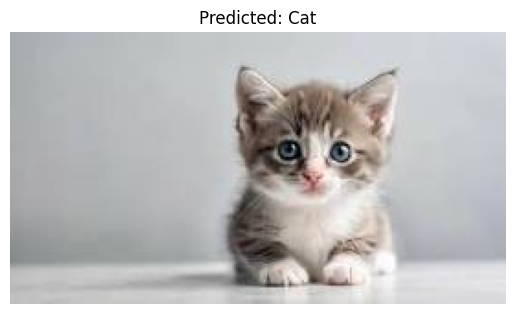

In [ ]:
import matplotlib.pyplot as plt

img_path = "/content/test/cat/cat1.jpg"
img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = "Cat" if prediction[0]<0.5 else "Dog"

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
